# 📈 Testing the SMA Crossover Strategy with PyNance

Welcome to this example notebook showcasing how to use  the `PyNance` package.

This notebook demonstrates how to:

- Load historical market data using `yfinance`
- Run strategies included in the package
- Visualize the resulting signals and performance
- Evaluate key performance metrics (Sharpe ratio, win rate, etc.)

---

📦 **PyNance** is a lightweight Python package for backtesting both technical and machine learning-based trading strategies.

Let's get started!


In [13]:
# Import packages
from pynance import SMAStrategy, MRStrategy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## 📊 SMA Strategy

The Simple Moving Average (SMA) strategy is a classic **technical analysis** method that generates trading signals based on the crossover of two moving averages:

- **Short SMA**: Captures recent price trends (e.g. 20-day)
- **Long SMA**: Reflects broader trends (e.g. 50-day)

### 🛠 How it works:
- **Buy (long)** when the short SMA crosses **above** the long SMA (bullish signal)
- **Sell (short)** when the short SMA crosses **below** the long SMA (bearish signal)

This strategy assumes that trends persist and attempts to ride momentum while avoiding noise.

Let’s apply this strategy using our PyNance package.

In [14]:
# Set the chosen ticker and duration of historical data
period='1y'
interval='1d'
ticker='MSFT'
cost_pct = 0.001 # Transaction cost modelled as a percentage of the trade cost

/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


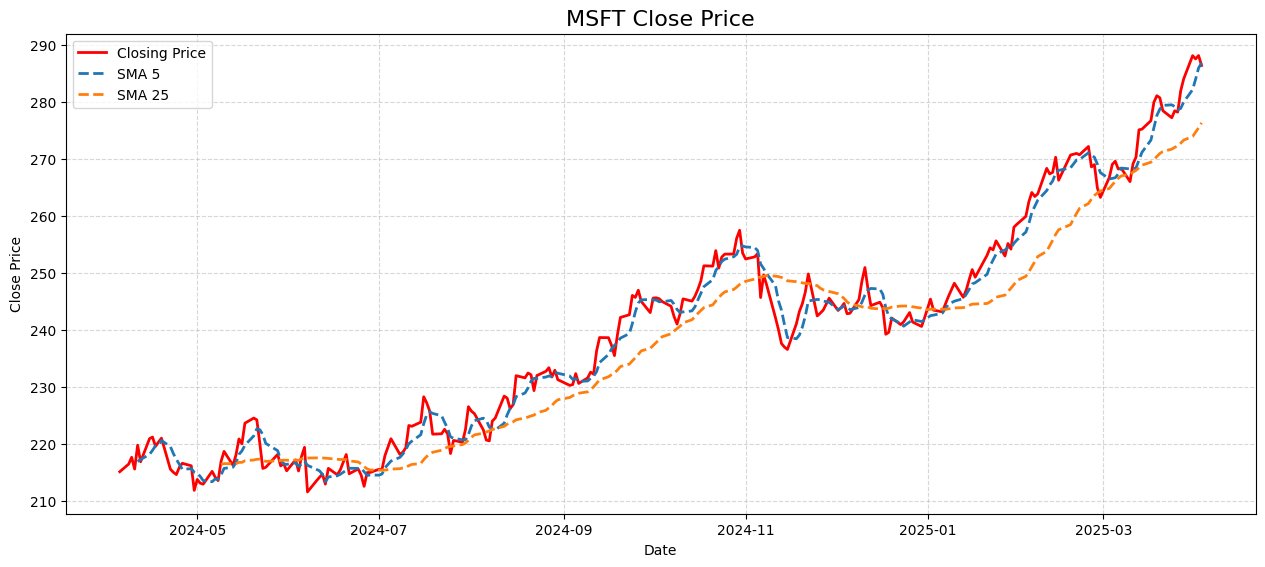

In [15]:
# Import historical data from yfinance
data = yf.Ticker('GLD').history(period, interval)

# Instantiate SMA Strategy Object and plot the historical data
sma_strat = SMAStrategy(data, period, interval, 5, 25)
sma_strat.plot_close(f'{ticker} Close Price', show_SMA = True)

/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Metric                   Value
----------------------------------------
Percentage Return        -27.05%
Win Rate                 44.98%
Average Gain             0.7065%
Average Loss             -0.8249%
Profit Factor            -0.17
Sharpe Ratio             -2.39
Volatility (Ann)         15.42%
Max Drawdown             30.54%
Trade Count              250


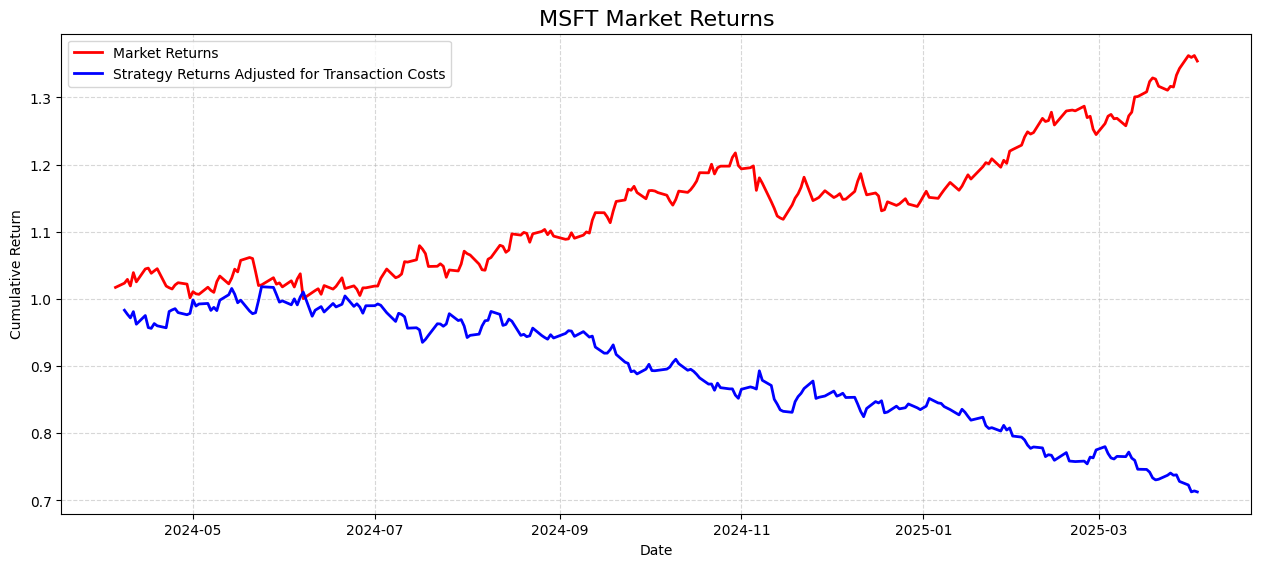

/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


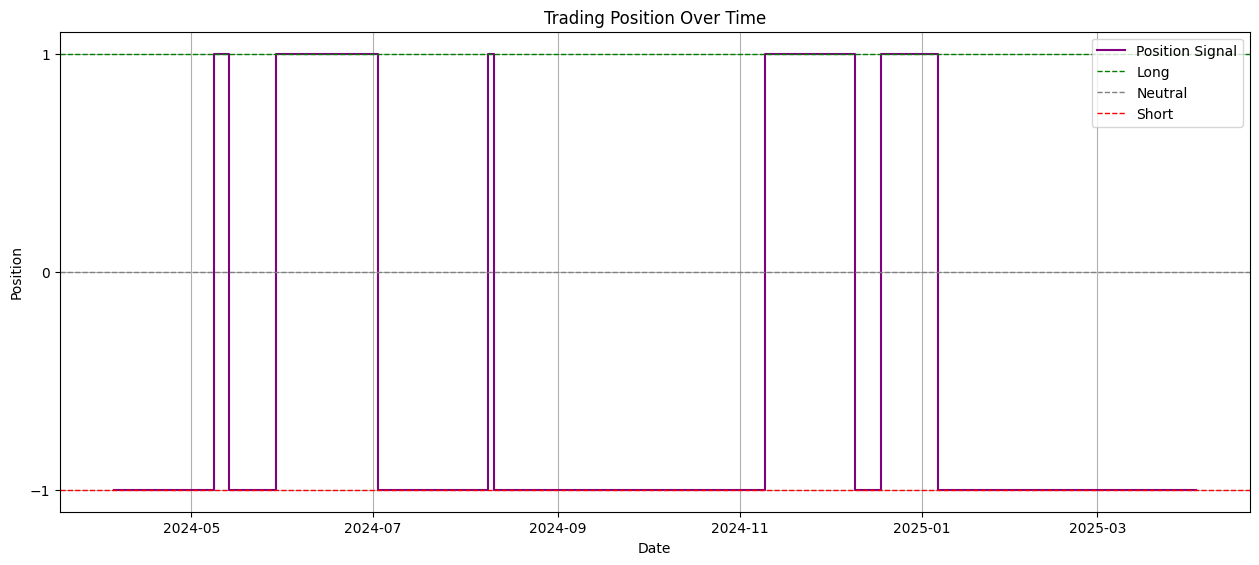

In [16]:
# Backtest the strategy on the data
cost_pct = 0.001 # Set a percentage transaction cost
sma_strat.back_test(cost_pct)

# Plot the results

sma_strat.plot_returns(f'{ticker} Market Returns')
sma_strat.plot_signals()

## 📉 Mean Reversion Strategy

In this section, we implement and test a **Mean Reversion Strategy**, which assumes that asset prices tend to revert to their historical mean over time.

We calculate a Simple Moving Average (SMA) and define a trading threshold based on the standard deviation of the deviation from the SMA.

- 📈 **Go Long** when price is significantly below the SMA  
- 📉 **Go Short** when price is significantly above the SMA  
- ⚖️ **Stay Neutral** when price is near the SMA


/home/tm1724/Algorithmic-Trading/PyNance/pynance/base.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


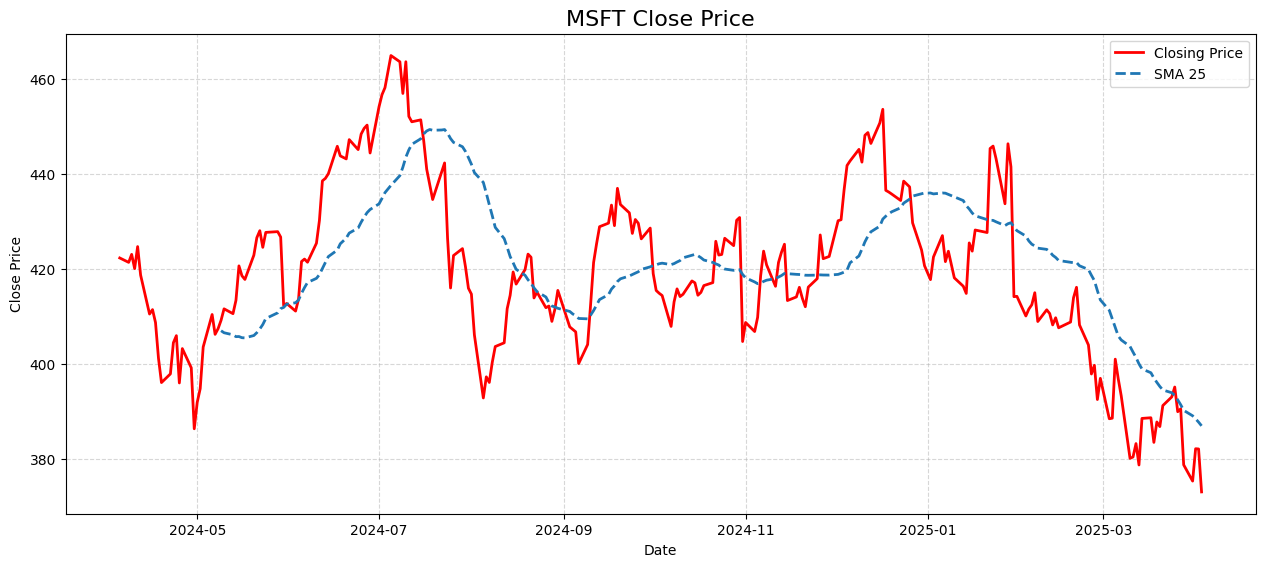

In [17]:
# Import historical data from yfinance
data = yf.Ticker(ticker).history(period, interval)

# Instantiate Mean Reversion Strategy Object and plot the historical data

window = 25 # Set the averaging window for the SMA
sma_strat = MRStrategy(data, period, interval, window) 
sma_strat.plot_close(f'{ticker} Close Price', show_SMA = True) # Plot the close price

Metric                   Value
----------------------------------------
Percentage Return        47.38%
Win Rate                 21.29%
Average Gain             1.1580%
Average Loss             -0.4705%
Profit Factor            0.12
Sharpe Ratio             3.10
Volatility (Ann)         11.52%
Max Drawdown             3.42%
Trade Count              81


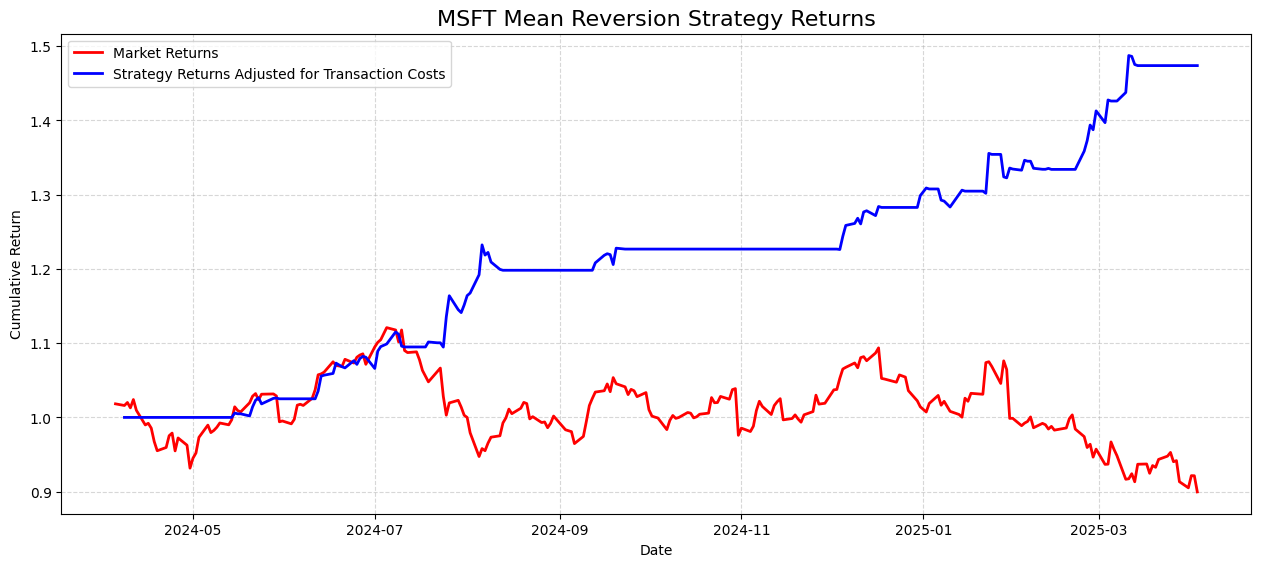

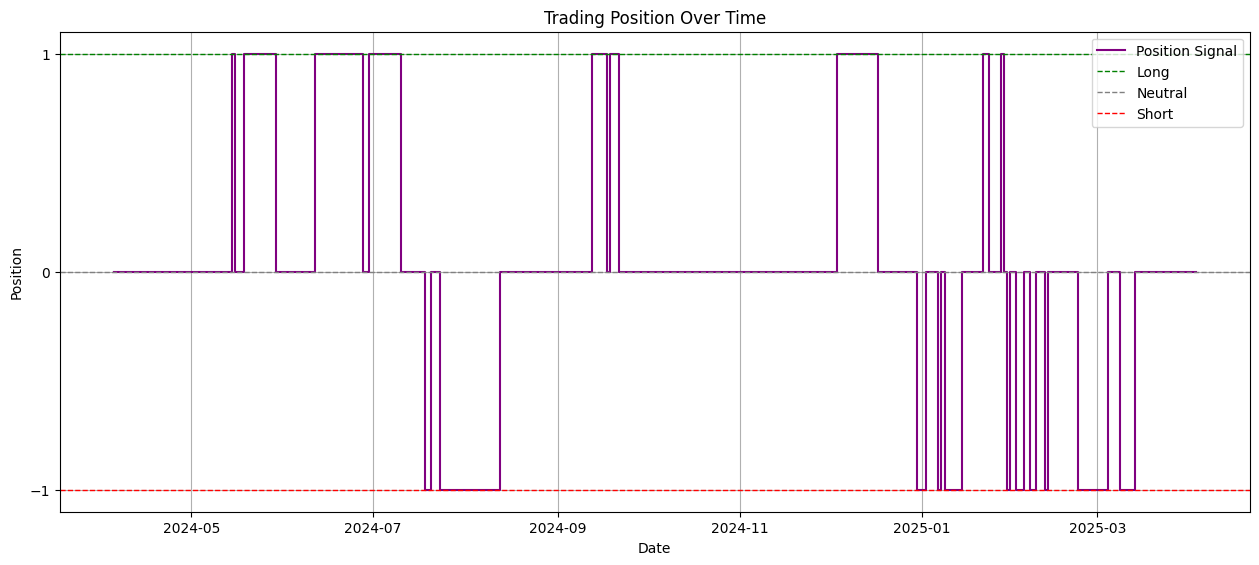

In [20]:
# Backtest the strategy on the data
cost_pct = 0.001 # Set a percentage transaction cost
sma_strat.back_test(cost_pct)

# Plot the results
sma_strat.plot_returns(f'{ticker} Mean Reversion Strategy Returns')
sma_strat.plot_signals() # Visualising the trading signals